<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/modelos_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
ruta_archivo_train = '/content/drive/My Drive/NHANES/dataset_train_imputado.csv'
ruta_archivo_test = '/content/drive/My Drive/NHANES/dataset_test_imputado.csv'


df_train = pd.read_csv(ruta_archivo_train)
df_test = pd.read_csv(ruta_archivo_test)


In [21]:
df_train.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,fam_cardio,fam_asma,fam_diabetes,hipertension,...,presion_sistolica_final,presion_diastolica_final,raza_origen_1,raza_origen_2,raza_origen_3,raza_origen_4,raza_origen_6,raza_origen_7,diabetes_2.0,diabetes_3.0
0,0.252775,1,0.836302,-0.754306,0.194624,0.547785,0,0,0,0,...,0.554321,0.310497,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.141000,0,0.540921,0.179832,1.469750,1.638509,0,1,0,1,...,-0.832083,0.030867,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.434103,1,-1.185449,0.580176,-0.746200,-0.095810,0,0,0,1,...,1.303890,0.310497,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.928552,1,-0.517855,-0.340617,0.121944,0.168128,0,0,1,0,...,-1.087660,-0.134685,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.366015,1,0.349781,0.313280,-0.747205,-0.982146,0,1,0,1,...,-0.213657,0.427966,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
df_test.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,fam_cardio,fam_asma,fam_diabetes,hipertension,...,presion_sistolica_final,presion_diastolica_final,raza_origen_1,raza_origen_2,raza_origen_3,raza_origen_4,raza_origen_6,raza_origen_7,diabetes_2.0,diabetes_3.0
0,-0.422269,1,-0.357335,-0.554134,0.271557,-0.209254,0,0,0,1,...,0.250529,0.836456,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.266074,0,-0.136862,0.646900,0.058258,-0.128435,0,0,0,0,...,-0.325419,-0.272991,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.491089,0,-2.062943,-0.620858,-1.405854,-0.304637,0,1,1,0,...,0.040209,-0.203157,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.096581,0,-1.828242,0.847073,-1.340363,-1.211241,0,1,0,1,...,-0.250708,0.030867,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.140268,0,0.276115,-0.687582,0.807326,-0.689028,0,0,0,1,...,0.387222,0.369723,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   fam_cardio                             4454 non-null   int64  
 7   fam_asma                               4454 non-null   int64  
 8   fam_diabetes                           4454 non-null   int64  
 9   hipertension                           4454 non-null   int64  
 10  bmi                                    4454 non-null   float64
 11  fumo

In [24]:
# NIVEL 1: Datos de Primera Consulta (Anamnesis y Examen Físico Básico)
# Lo que el médico obtiene preguntando y pesando/midiendo al paciente.
nivel_1_basico = [
    'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
    'fumador_actual', 'fumo_100_cigarrillos', 'consumo_alcohol_ultimo_año',
    'consumo_excesivo_alcohol_ultimo_año', 'act_caminar_bici', 'act_moderada',
    'act_vigorosa', 'realiza_actividad_intensidad_moderada',
    'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
    'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
]

# NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# Datos que requieren una historia clínica o un tensiómetro.
nivel_2_antecedentes = [
    'fam_cardio', 'fam_asma', 'fam_diabetes', 'hipertension',
    'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
    'ACV', 'colesterol_alto', 'riñones_debiles_fallando',
    'presion_sistolica_final', 'presion_diastolica_final'
]

# NIVEL 3: Laboratorio Avanzado
# Resultados bioquímicos específicos.
nivel_3_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'ldl', 'proteina_c',
    'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina'
]

# Unificamos todas para el entrenamiento inicial
features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

🚀 Iniciando simulación por niveles...

✅ Solo Consulta Básica: AUC-ROC = 0.7408
✅ Consulta + Antecedentes/Presión: AUC-ROC = 0.8023
✅ Perfil Completo (Laboratorio): AUC-ROC = 0.8033


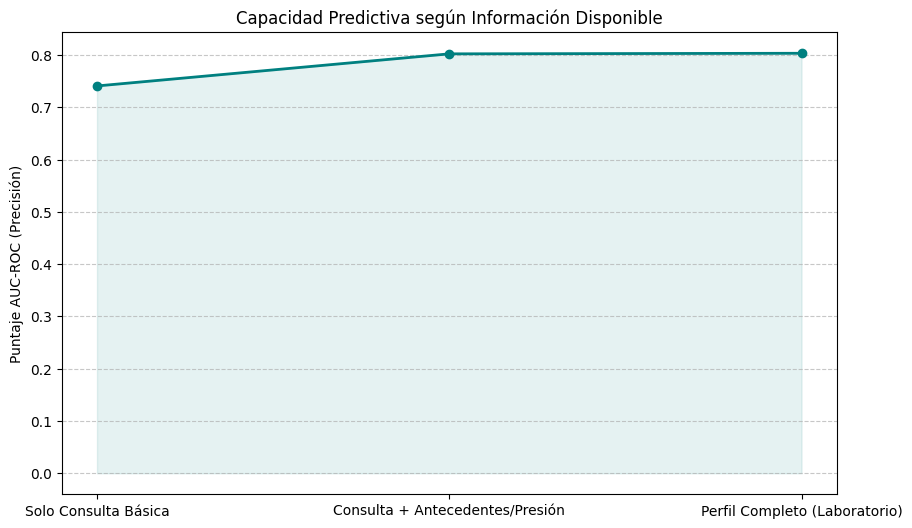

In [25]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# 1. Definimos los sets de variables (aseguramos que existan en el DF)
nivel_1 = [c for c in nivel_1_basico if c in df_train.columns]
nivel_2 = nivel_1 + [c for c in nivel_2_antecedentes if c in df_train.columns]
nivel_3 = nivel_2 + [c for c in nivel_3_laboratorio if c in df_train.columns]

niveles = [nivel_1, nivel_2, nivel_3]
nombres_niveles = ['Solo Consulta Básica', 'Consulta + Antecedentes/Presión', 'Perfil Completo (Laboratorio)']
resultados_auc = []

y_train = df_train['alto_riesgo']
y_test = df_test['alto_riesgo']

print("🚀 Iniciando simulación por niveles...\n")

for i, columnas in enumerate(niveles):
    # Filtramos las columnas correspondientes
    X_train_sub = df_train[columnas]
    X_test_sub = df_test[columnas]

    # Entrenamos el modelo
    modelo = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
    modelo.fit(X_train_sub, y_train)

    # Predecimos probabilidades
    probs = modelo.predict_proba(X_test_sub)[:, 1]
    auc = roc_auc_score(y_test, probs)
    resultados_auc.append(auc)

    print(f"✅ {nombres_niveles[i]}: AUC-ROC = {auc:.4f}")

# 2. Visualización de la evolución del modelo
plt.figure(figsize=(10, 6))
plt.plot(nombres_niveles, resultados_auc, marker='o', linestyle='-', color='teal', linewidth=2)
plt.fill_between(nombres_niveles, resultados_auc, alpha=0.1, color='teal')
plt.title('Capacidad Predictiva según Información Disponible')
plt.ylabel('Puntaje AUC-ROC (Precisión)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

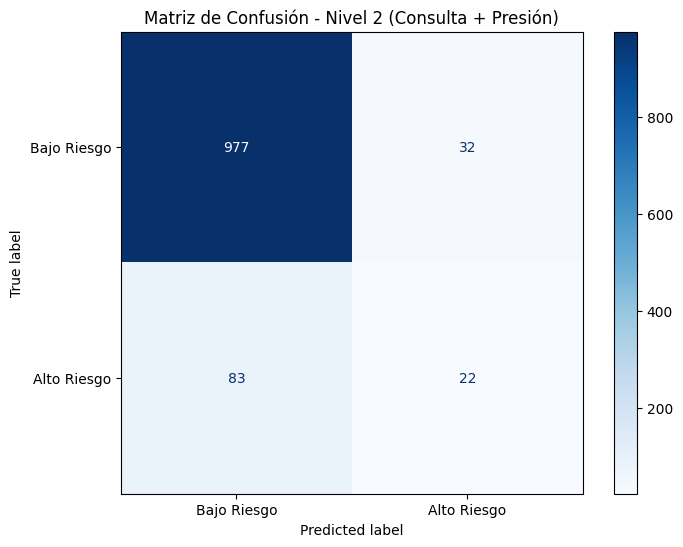

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Usamos el modelo del Nivel 2 para el ejemplo
modelo_final = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
modelo_final.fit(df_train[nivel_2], y_train)
preds_final = modelo_final.predict(df_test[nivel_2])

# Graficar Matriz de Confusión
cm = confusion_matrix(y_test, preds_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bajo Riesgo', 'Alto Riesgo'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title('Matriz de Confusión - Nivel 2 (Consulta + Presión)')
plt.show()

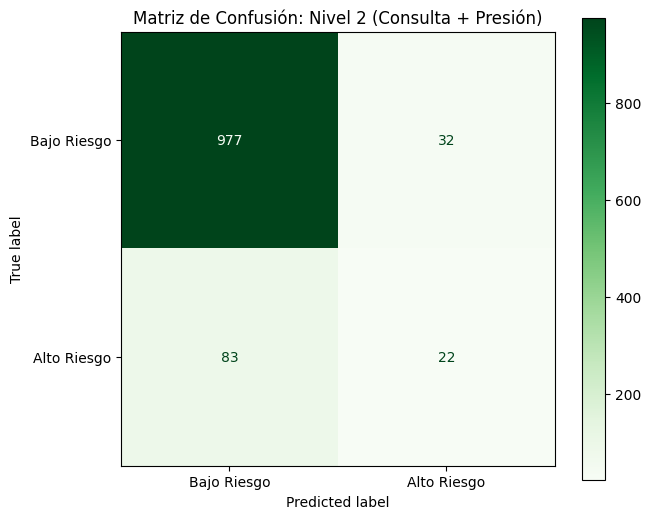

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Entrenamos el modelo del Nivel 2 (el punto óptimo)
modelo_n2 = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
modelo_n2.fit(df_train[nivel_2], y_train)

# 2. Obtenemos predicciones
preds_n2 = modelo_n2.predict(df_test[nivel_2])

# 3. Graficamos
fig, ax = plt.subplots(figsize=(7, 6))
cm = confusion_matrix(y_test, preds_n2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bajo Riesgo', 'Alto Riesgo'])
disp.plot(cmap='Greens', ax=ax)
plt.title('Matriz de Confusión: Nivel 2 (Consulta + Presión)')
plt.show()

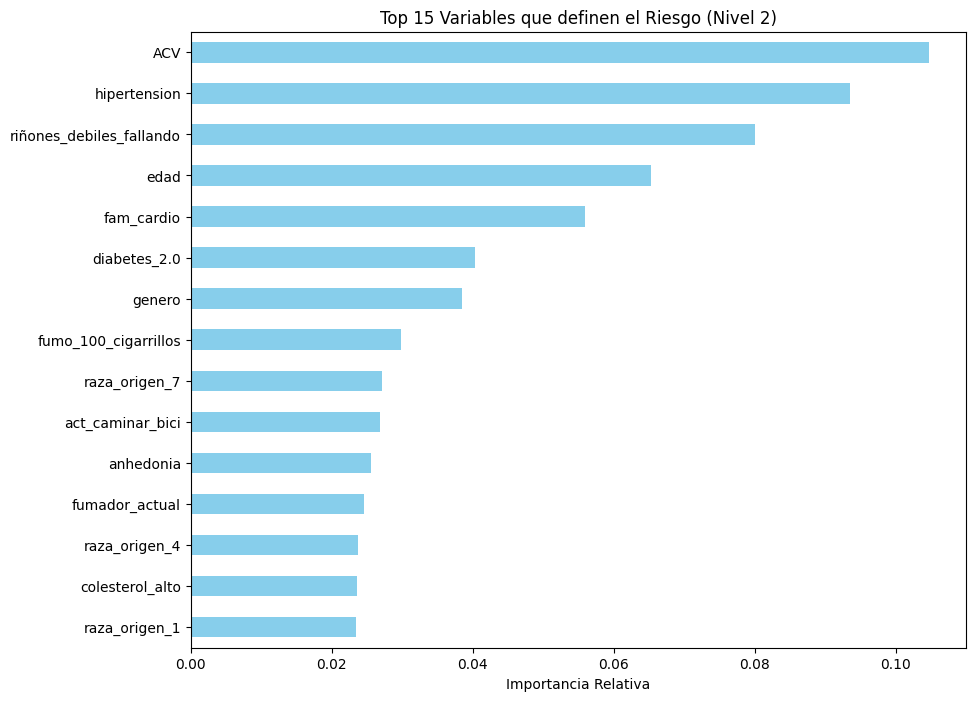

In [28]:
# Gráfico de importancia de variables para el Nivel 2
importances = pd.Series(modelo_n2.feature_importances_, index=nivel_2).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importances.tail(15).plot(kind='barh', color='skyblue')
plt.title('Top 15 Variables que definen el Riesgo (Nivel 2)')
plt.xlabel('Importancia Relativa')
plt.show()

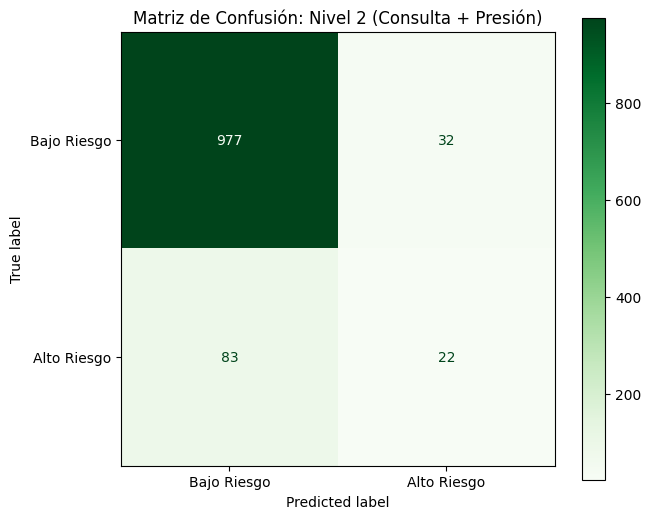

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Entrenamos el modelo del Nivel 2 (el punto óptimo)
modelo_n2 = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
modelo_n2.fit(df_train[nivel_2], y_train)

# 2. Obtenemos predicciones
preds_n2 = modelo_n2.predict(df_test[nivel_2])

# 3. Graficamos
fig, ax = plt.subplots(figsize=(7, 6))
cm = confusion_matrix(y_test, preds_n2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bajo Riesgo', 'Alto Riesgo'])
disp.plot(cmap='Greens', ax=ax)
plt.title('Matriz de Confusión: Nivel 2 (Consulta + Presión)')
plt.show()

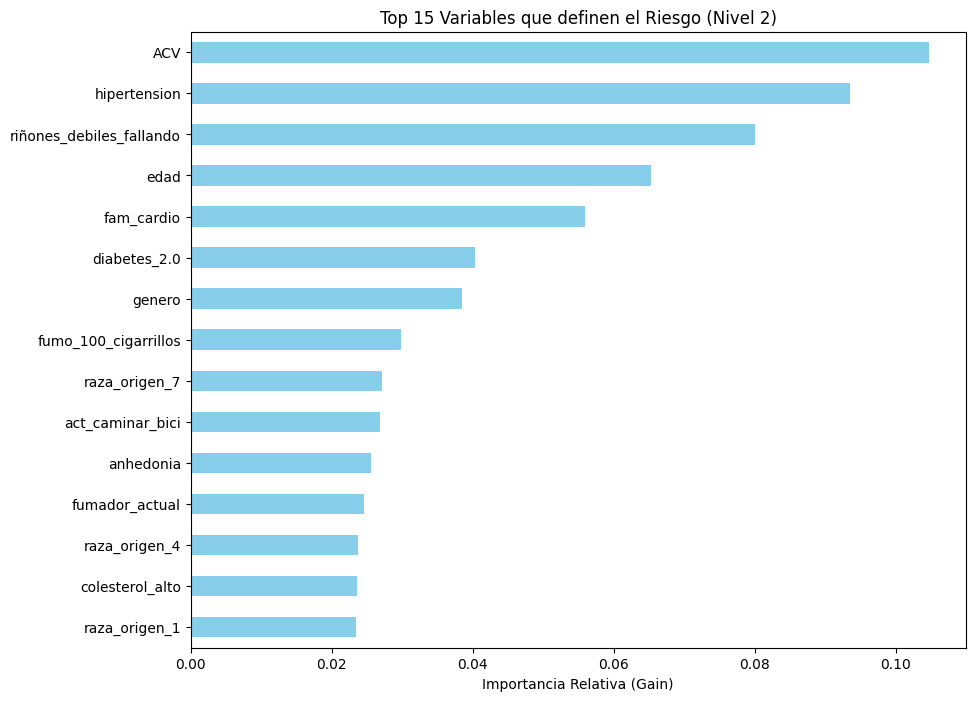

In [30]:
# Gráfico de importancia de variables para el Nivel 2
importances = pd.Series(modelo_n2.feature_importances_, index=nivel_2).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importances.tail(15).plot(kind='barh', color='skyblue')
plt.title('Top 15 Variables que definen el Riesgo (Nivel 2)')
plt.xlabel('Importancia Relativa (Gain)')
plt.show()

prueba lab

🔬 Resultado Solo Laboratorio (Bioquímico):
AUC-ROC = 0.6974


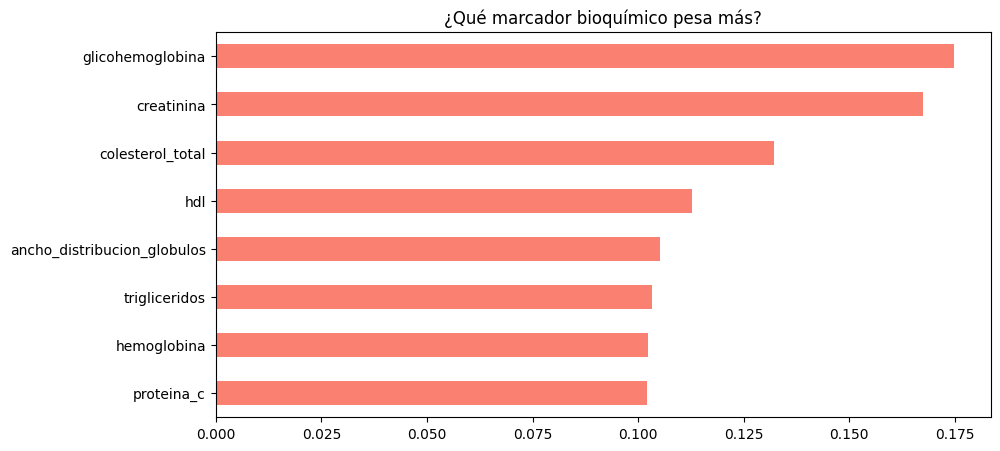

In [31]:
# 1. Definimos el set de solo laboratorio
# Aseguramos que usamos los nombres exactos de tus columnas
solo_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
    'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina'
]

# 2. Calculamos el factor de desbalance (ya lo tenemos, pero por seguridad)
factor_desbalance = y_train.value_counts()[0] / y_train.value_counts()[1]

# 3. Entrenamos el modelo "Solo Bioquímico"
modelo_lab = xgb.XGBClassifier(
    scale_pos_weight=factor_desbalance,
    random_state=42,
    eval_metric='logloss'
)

modelo_lab.fit(df_train[solo_laboratorio], y_train)

# 4. Evaluamos
probs_lab = modelo_lab.predict_proba(df_test[solo_laboratorio])[:, 1]
auc_lab = roc_auc_score(y_test, probs_lab)

print(f"🔬 Resultado Solo Laboratorio (Bioquímico):")
print(f"AUC-ROC = {auc_lab:.4f}")

# 5. Importancia de las variables de laboratorio
importances_lab = pd.Series(modelo_lab.feature_importances_, index=solo_laboratorio).sort_values(ascending=True)
plt.figure(figsize=(10, 5))
importances_lab.plot(kind='barh', color='salmon')
plt.title('¿Qué marcador bioquímico pesa más?')
plt.show()

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Definimos un espacio de búsqueda
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'subsample': [0.7, 0.8, 0.9],
    'scale_pos_weight': [factor_desbalance] # Mantenemos el balanceo
}

# El buscador probará diferentes combinaciones
search = RandomizedSearchCV(xgb.XGBClassifier(), param_grid, n_iter=10, cv=3, scoring='roc_auc')
search.fit(df_train[nivel_3], y_train)

modelo_optimizado = search.best_estimator_
print(f"✅ Mejor AUC tras optimización: {search.best_score_:.4f}")

✅ Mejor AUC tras optimización: 0.8651
